In [2]:
import numpy as np
import pickle
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
from os.path import join

import dnnlib
import dnnlib.tflib as tflib
from encoder.generator_model import Generator

from matplotlib import pyplot as plt
%matplotlib inline

from utils import Shower

/home1/xiewenbin/anaconda3/envs/tf_1.15/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home1/xiewenbin/anaconda3/envs/tf_1.15/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home1/xiewenbin/anaconda3/envs/tf_1.15/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home1/xiewenbin/anaconda3/envs

/home1/xiewenbin/anaconda3/envs/tf_1.15/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home1/xiewenbin/anaconda3/envs/tf_1.15/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home1/xiewenbin/anaconda3/envs/tf_1.15/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home1/xie

In [3]:
model_url = './cache/karras2019stylegan-ffhq-1024x1024.pkl'
dlatent_path = './data'
batch_size = 1
image_ids = ['67138', '67139', 'sumiao', 'style']

In [4]:
tflib.init_tf()
with open(model_url, 'rb') as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, batch_size);



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
def load_dlatent(image_id):
    dl_path = join(dlatent_path, image_id + '.npy')
    dlatent = np.load(dl_path)
    dlatent = dlatent.reshape(-1, 18, 512)
    return dlatent

In [6]:
dlatent0 = load_dlatent(image_ids[0])
dlatent1 = load_dlatent('68319')

generated
generated
generated
generated


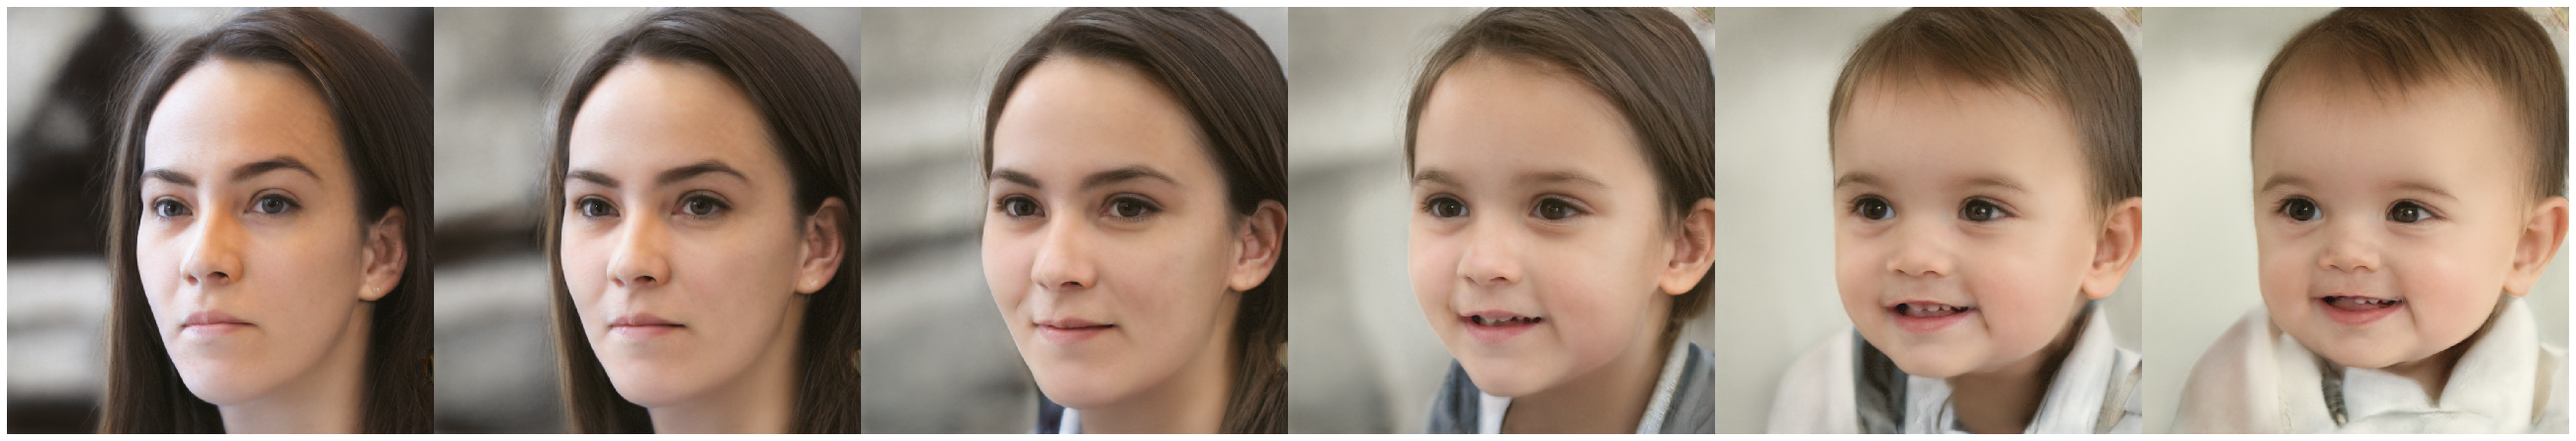

In [7]:
image0 = generator.generate_images(dlatent0)[0]
image1 = generator.generate_images(dlatent1)[0]

n = 6
shower = Shower(col=n)
plt.figure(figsize=(6 * n, 6))
shower.add(image0)
for i in range(2, 10, 2):
    w = i / 10.
    dlatent = dlatent0 * ( 1 - w) + dlatent1 * w
    image_fuse = generator.generate_images(dlatent)[0]
    shower.add(image_fuse)
    print('generated')
shower.add(image1)
shower.show('fuse')

In [21]:
######################### style transfer

In [35]:
dlatent_style = load_dlatent(image_ids[3])

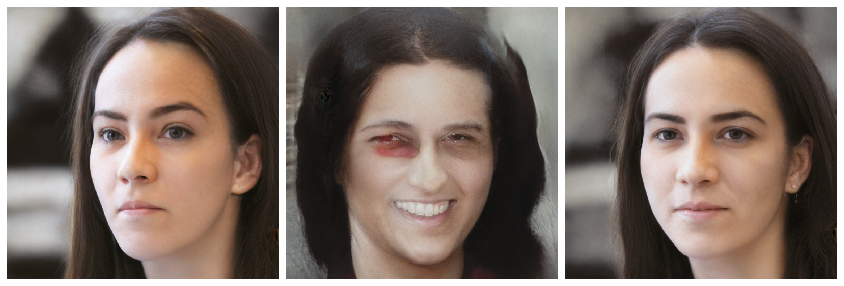

In [37]:
shower = Shower(3)
plt.figure(figsize=(3 * 5, 5))
shower.add(generator.generate_images(dlatent0)[0])
shower.add(generator.generate_images(dlatent_style)[0])

w = 0.7
new_dlatent = dlatent0 * w + dlatent_style * (1 - w)
shower.add(generator.generate_images(new_dlatent)[0])

shower.show()